# Proyek UTS

Berikut merupakan pembuatan model <em>machine learning</em> untuk melakukan beberapa analisa, seperti:
1. Memprediksi pertumbuhan kasus COVID-19 di Jakarta
2. Menguji efektivitas dari pemberian vaksin yang sudah diberikan kepada sejumlah pejabat publik, petugas kesehatan, dan orang lanjut usia.

Sebelum itu, data perlu disiapkan terlebih dahulu.

**Mengimpor <em>libraries</em>**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Sebagai persiapan awal dalam mengolah data, kita akan membuat 3 buah fungsi.
1. ```string_to_timestamp(date)```<br>
<br>Fungsi ini berguna untuk mengubah sebuah tanggal bertipe data ```string``` menjadi bertipe data ```pandas.Timestamp()```.
<br> 
<br>
2. ```multi_string_to_timestamp(data, key)```<br>
<br>Fungsi ini berguna untuk mengubah seluruh nilai kolom ```key``` yang berisikan tanggal bertipe data string menjadi bertipe data ```pandas.Timestamp()```<br>
Contoh: 5 Maret 2021 --> ```pd.Timestamp(5, 3, 2021, 00:00:00)```.
<br> 
<br>
3. ```filter_data_by_date(data, key, start_date, end_date)```<br>
<br> Fungsi ini berguna untuk megambil memfilter suatu dataframe berdasarkan tanggal pada kolom ```key```, dari tanggal ```start_date``` sampai tanggal ```end date```.

In [2]:
from datetime import date

def string_to_timestamp(date):
    list_of_string = date.split(" ")
    
    month_dict = {
        'Januari'  : 1,
        'Februari' : 2,
        'Maret'    : 3,
        'April'    : 4,
        'Mei'      : 5,
        'Juni'     : 6,
        'Juli'     : 7,
        'Agustus'  : 8,
        'September': 9,
        'Oktober'  : 10,
        'November' : 11,
        'Desember' : 12,
    }
    
    day = int(list_of_string[0])
    month = month_dict[list_of_string[1]]
    year = int(list_of_string[2])
    
    return pd.Timestamp(year, month, day, 0)

def multi_string_to_timestamp(data, key):
    string_date = dataset3[key]
    formatted_date = []
    for i in range(len(string_date)):
        date =string_date[i]
        if(type(date) == type("")):
             date = string_to_timestamp(string_date[i])
        formatted_date.append(date)
    return formatted_date

def filter_data_by_date(data, key, start_date, end_date=None):
    
    start_index = data[data[key]==start_date].index.values[0]
    end_index = len(data)
    
    if (end_date != None):
        end_index = data[data[key]==end_date].index.values[0]+1
    
    filtered_data = data.iloc[start_index:end_index]
    
    return filtered_data    

# Soal Nomor 1

**Mengimpor <em>dataset</em> yang diperlukan**

In [3]:
dataset1 = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', usecols="A,T", sheet_name='Data Indonesia dan Jakarta')

In [4]:
dataset1

,Tanggal,Positif Harian (Jakarta)
0,2020-03-01,0
1,2020-03-02,0
2,2020-03-03,3
3,2020-03-04,0
4,2020-03-05,4
...,...,...
402,2021-04-07,862
403,2021-04-08,1239
404,2021-04-09,1013
405,2021-04-10,977


In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Tanggal                   407 non-null    datetime64[ns]
 1   Positif Harian (Jakarta)  407 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.5 KB


In [6]:
# dataset1 = dataset1.iloc[:-1,:]
# dataset1.info()

Kita akan membuat 3 jenis model Linear Regression. 
* Mulai dari 1 Maret 2020 semenjak kasus pertama
* Mulai dari 1 Januari 2021 semenjak awal tahun baru
* Mulai dari 9 Februari 2021 semenjak diadakan PPKM jilid 2<br>

Input dari model yang akan kita buat adalah fitur "Tanggal" dari sheet "Data Indonesia dan Jakarta". Sedangkan, outputnya adalah fitur "Positif Harian (Jakarta)" dari sheet "Data Indonesia dan Jakarta". 

In [7]:
# Input
x11 = filter_data_by_date(dataset1, "Tanggal", string_to_timestamp("1 Maret 2020")).iloc[:,0:1].values
x12 = filter_data_by_date(dataset1, "Tanggal", string_to_timestamp("1 Januari 2021")).iloc[:,0:1].values
x13 = filter_data_by_date(dataset1, "Tanggal", string_to_timestamp("9 Februari 2021")).iloc[:,0:1].values

# Output
y11 = filter_data_by_date(dataset1, "Tanggal", string_to_timestamp("1 Maret 2020"))['Positif Harian (Jakarta)'].values
y12 = filter_data_by_date(dataset1, "Tanggal", string_to_timestamp("1 Januari 2021"))['Positif Harian (Jakarta)'].values
y13 = filter_data_by_date(dataset1, "Tanggal", string_to_timestamp("9 Februari 2021"))['Positif Harian (Jakarta)'].values

In [8]:
x11.shape, y11.shape

((407, 1), (407,))

**Encoding the Date Feature**

Fitur "Tanggal" yang digunakan sebagai input masih bertipe data pandas.Timestamp(). Oleh karena itu, sebelum melatih model, kita perlu melakukan encoding pada fitur "Tanggal". Tujuannya adalah agar data input berubah menjadi data integer sehingga bisa dikalkulasi di dalam model machine learning.

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(), [0])], remainder='passthrough')

x11 = np.array(ct.fit_transform(x11))
x12 = np.array(ct.fit_transform(x12))
x13 = np.array(ct.fit_transform(x13))

**Training the Linear Regression**

Setelah data sudah dirasa bersih, kita bisa mulai membuat model machine learning.

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg_1 = LinearRegression(fit_intercept=False)
lin_reg_1.fit(x11, y11)

lin_reg_2 = LinearRegression(fit_intercept=False)
lin_reg_2.fit(x12, y12)

lin_reg_3 = LinearRegression(fit_intercept=False)
lin_reg_3.fit(x13, y13)

LinearRegression(fit_intercept=False)

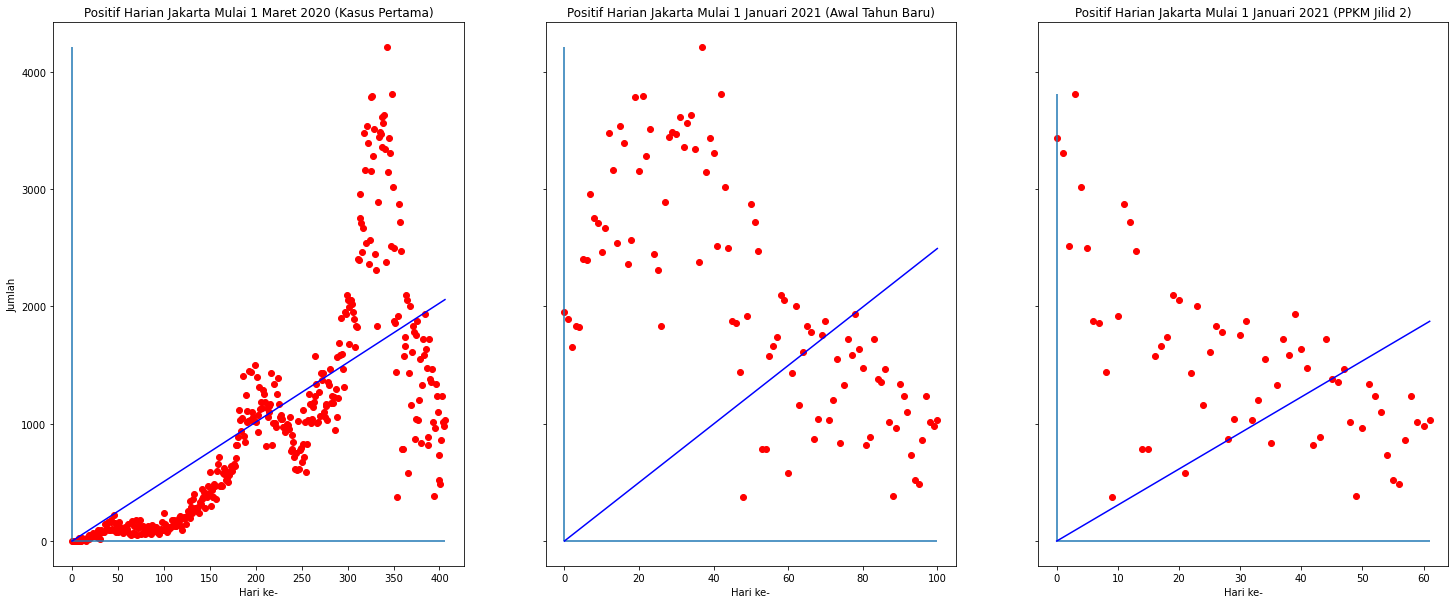

In [11]:
fig, axes = plt.subplots(ncols=3, figsize=(25,10), sharey=True)

plt.sca(axes[0])
plt.scatter(x11, y11, color = 'red')
plt.plot(x11, lin_reg_1.predict(x11), color = 'blue')
plt.title('Positif Harian Jakarta Mulai 1 Maret 2020 (Kasus Pertama)')
plt.xlabel('Hari ke-')
plt.ylabel('Jumlah')
plt.vlines(0, 0, y11.max())
plt.hlines(0, x11.min(), x11.max())

plt.sca(axes[1])
plt.scatter(x12, y12, color = 'red')
plt.plot(x12, lin_reg_2.predict(x12), color = 'blue')
plt.title('Positif Harian Jakarta Mulai 1 Januari 2021 (Awal Tahun Baru)')
plt.xlabel('Hari ke-')
plt.vlines(0, 0, y12.max())
plt.hlines(0, x12.min(), x12.max())

plt.sca(axes[2])
plt.scatter(x13, y13, color = 'red')
plt.plot(x13, lin_reg_3.predict(x13), color = 'blue')
plt.title('Positif Harian Jakarta Mulai 1 Januari 2021 (PPKM Jilid 2)')
plt.xlabel('Hari ke-')
plt.vlines(0, 0, y13.max())
plt.hlines(0, x13.min(), x13.max())

plt.show()

# Analisa Nomor 1

## a. Pengaruh variabel $m$ pada formula $y=mx+b$

Pada persamaan $y=mx+b$ variabel $m$ berperan sebagai gradien. Gradien merupakan nilai kemiringan garis yang dibentuk oleh persamaan tersebut. Secara matematis, definisi gradien adalah sebagai berikut.
<br>
<br>
$
\begin{align}
\Delta{y} &: \text{Selisih angka positif harian Jakarta}\\
\Delta{x} &: \text{Kurun waktu (dalam satuan hari)}\\ 
\end{align}
$
<br>
$$
\begin{align}
m =  \frac{\Delta{y}}{\Delta{x}}
\end{align}
$$
<br>
Dalam kasus ini, gradien adalah laju pertambahan estimasi angka positif harian Jakarta dalam satu hari. Semakin besar angka gradien, pertambahan estimasi angka positif harian Jakarta dalam satu hari semakin tinggi. Sebaliknya, semakin kecil angka gradien, pertambahan estimasi angka positif harian Jakarta dalam satu hari semakin rendah. Oleh karena itu, kita mengharapkan angka gradien ini bisa seminimal mungkin.

## b. Prediksi Kasus tanggal 12 April 2021

In [12]:
current = string_to_timestamp("11 April 2021")
n1 = (current - string_to_timestamp("1 Maret 2020")).days
n2 = (current - string_to_timestamp("1 Januari 2021")).days
n3 = (current - string_to_timestamp("9 Februari 2021")).days

In [13]:
print("Prediksi Model '1 Maret 2020'    : %.3f" %(lin_reg_1.predict([[n1]])[0]))
print("Prediksi Model '1 Januari 2021'  : %.3f" %(lin_reg_2.predict([[n2]])[0]))
print("Prediksi Model '9 Februari 2021' : %.3f" %(lin_reg_3.predict([[n3]])[0]))

Prediksi Model '1 Maret 2020'    : 2058.808
Prediksi Model '1 Januari 2021'  : 2494.282
Prediksi Model '9 Februari 2021' : 1873.755


In [14]:
y_current = dataset1[dataset1["Tanggal"] == string_to_timestamp("9 April 2021")]['Positif Harian (Jakarta)']
print("Selisih Prediksi Model '1 Maret 2020' dengan angka sebenarnya   : %.3f" %(abs(lin_reg_1.predict([[n1]]) - y_current)))
print("Selisih Prediksi Model '1 Januari 2021' dengan angka sebenarnya : %.3f" %(abs(lin_reg_2.predict([[n2]]) - y_current)))
print("Selisih Prediksi Model '9 Februari 2021' dengan angka sebenarnya: %.3f" %(abs(lin_reg_3.predict([[n3]]) - y_current)))

Selisih Prediksi Model '1 Maret 2020' dengan angka sebenarnya   : 1045.808
Selisih Prediksi Model '1 Januari 2021' dengan angka sebenarnya : 1481.282
Selisih Prediksi Model '9 Februari 2021' dengan angka sebenarnya: 860.755


Berdasarkan data tersebut kita mengetahui bahwa hasil prediksi model yang mengevaluasi data mulai dari tanggal 9 Februari 2021 adalah angka prediksi yang paling mendekati angka sebenarnya.

# Soal Nomor 2

Saat ini, akan dilakukan peninjauan pada matriks korelasi dari suatu <em>dataset</em> yang nantinya akan dipakai untuk memprediksi angka "Positif Harian Jakarta". Dengan menggunakan matiks korelasi, fitur-fitur yang digunakan sebagai input akan disaring atau dipilih beberapa terlebih dahulu. Tujuannya adalah untuk meningkatkan kualitas model yang akan dibuat.

**Mengimpor <em>dataset</em> yang diperlukan**

Kita memerlukan data dari <em>sheet</em> 'RDT Ag' dan <em>sheet</em> 'Vaksinasi'.

In [15]:
dataset2 = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', header=1, usecols="B, O:V", sheet_name='RDT Ag')
dataset3 = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', header=4, usecols="A:U", sheet_name='Vaksinasi')

**Merapihkan dan menyaring data dari <em>sheet</em> 'RDT Ag'**

In [16]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tgl                        102 non-null    datetime64[ns]
 1   Tes Harian                 102 non-null    int64         
 2   Positif  Harian            102 non-null    int64         
 3   Negatif Harian             102 non-null    int64         
 4   Positivity Rate Harian     102 non-null    object        
 5   Total Kumulatif            102 non-null    int64         
 6   Positif Kumulatif          102 non-null    int64         
 7   Negatif Kumulatif          102 non-null    int64         
 8   Positivity Rate Kumulatif  102 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 7.3+ KB


Kita akan menggabungkan data dari dua <em>sheet</em> yang berbeda. Untuk mempermudah kita dalam mengidentifikasi data, kita perlu mencegah adanya kemiripan nama fitur. Oleh karena itu, nama pada setiap fiturnya akan diberi label sesuai dengan nama <em>sheet</em> yang menjadi penyedia fitur tersebut.

In [17]:
dataset2 = dataset2.rename(columns={'Tgl' : 'Tanggal',
                                    'Tes Harian' : 'Tes Harian (RDT Ag)',
                                    'Positif  Harian' : 'Positif Harian (RDT Ag)',
                                    'Positivity Rate Harian' : 'Positivity Rate Harian (RDT Ag)'})
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          102 non-null    datetime64[ns]
 1   Tes Harian (RDT Ag)              102 non-null    int64         
 2   Positif Harian (RDT Ag)          102 non-null    int64         
 3   Negatif Harian                   102 non-null    int64         
 4   Positivity Rate Harian (RDT Ag)  102 non-null    object        
 5   Total Kumulatif                  102 non-null    int64         
 6   Positif Kumulatif                102 non-null    int64         
 7   Negatif Kumulatif                102 non-null    int64         
 8   Positivity Rate Kumulatif        102 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 7.3+ KB


Dalam proses pembuatan model <em>machine learning</em> nanti, kita tidak memerlukan semua fitur dari sheet "RDT Ag" yang sudah kita ambil. Oleh karena itu, kita perlu melakukan penyaringan dengan memilih beberapa fitur, yakni:
1. Tanggal
2. Tes Harian (RDT Ag)
3. Positif Harian (RDT Ag) 
4. Positivity Rate Harian (RDT Ag)

In [18]:
dataset2 = dataset2.iloc[:, [0, 1, 2, 4]]
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          102 non-null    datetime64[ns]
 1   Tes Harian (RDT Ag)              102 non-null    int64         
 2   Positif Harian (RDT Ag)          102 non-null    int64         
 3   Positivity Rate Harian (RDT Ag)  102 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ KB


**Merapihkan dan menyaring data dari <em>sheet</em> 'Vaksinasi'**

In [19]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          39 non-null     object 
 1   Target Vaksinasi    39 non-null     int64  
 2   Vaksinasi 1         39 non-null     int64  
 3   Vaksinasi 2         39 non-null     int64  
 4   Persentase 1        39 non-null     float64
 5   Persentase 2        39 non-null     float64
 6   Target Vaksinasi.1  39 non-null     int64  
 7   Vaksinasi 1.1       39 non-null     int64  
 8   Vaksinasi 2.1       39 non-null     int64  
 9   Persentase 1.1      39 non-null     float64
 10  Persentase 2.1      39 non-null     float64
 11  Target Vaksinasi.2  39 non-null     int64  
 12  Vaksinasi 1.2       39 non-null     int64  
 13  Vaksinasi 2.2       39 non-null     int64  
 14  Persentase 1.2      39 non-null     float64
 15  Persentase 2.2      39 non-null     float64
 16  Target Vak

Kita tidak memerlukan semua fitur yang  telah diambil dari <em>sheet</em> "Vaksinasi". Beberapa fitur akan kita buang dari </em>dataframe</em>. Fitur-fitur tersebut adalah sebagai berikut.
1. Target Vaksinasi
2. Target Vaksinasi.1
3. Targat Vaksinasi.2
4. Target Vaksinasi.3


In [20]:
dataset3 = dataset3.drop(['Target Vaksinasi', 'Target Vaksinasi.1', 'Target Vaksinasi.2', 'Target Vaksinasi.3' ], axis=1)
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      39 non-null     object 
 1   Vaksinasi 1     39 non-null     int64  
 2   Vaksinasi 2     39 non-null     int64  
 3   Persentase 1    39 non-null     float64
 4   Persentase 2    39 non-null     float64
 5   Vaksinasi 1.1   39 non-null     int64  
 6   Vaksinasi 2.1   39 non-null     int64  
 7   Persentase 1.1  39 non-null     float64
 8   Persentase 2.1  39 non-null     float64
 9   Vaksinasi 1.2   39 non-null     int64  
 10  Vaksinasi 2.2   39 non-null     int64  
 11  Persentase 1.2  39 non-null     float64
 12  Persentase 2.2  39 non-null     float64
 13  Vaksinasi 1.3   39 non-null     int64  
 14  Vaksinasi 2.3   39 non-null     int64  
 15  Persentase 1.3  39 non-null     float64
 16  Persentase 2.3  39 non-null     float64
dtypes: float64(8), int64(8), object(1)
me

Seperti yang sudah disinggung di atas, kita akan menggabungkan data dari dua sheet yang berbeda. Untuk mempermudah kita dalam mengidentifikasi data, kita perlu mencegah adanya kemiripan nama fitur dan ketidaktepatan nama fitur, seperti fitur "Unnamed: 0". Oleh karena itu, nama fitur tersebut akan kita ganti dan nama fitur lainnya akan diberi label sesuai dengan nama sheet yang menjadi penyedia fitur tersebut.

In [21]:
dataset3 = dataset3.rename(columns={
                                  'Unnamed: 0'     : 'Tanggal',
                                  'Vaksinasi 1'    : 'Vaksinasi 1 (Tenaga Kesehatan)',
                                  'Vaksinasi 2'    : 'Vaksinasi 2 (Tenaga Kesehatan)',
                                  'Persentase 1'   : 'Persentase 1 (Tenaga Kesehatan)',
                                  'Persentase 2'   : 'Persentase 2 (Tenaga Kesehatan)',
                                  'Vaksinasi 1.1'  : 'Vaksinasi 1 (Lansia)',
                                  'Vaksinasi 2.1'  : 'Vaksinasi 2 (Lansia)',
                                  'Persentase 1.1' : 'Persentase 1 (Lansia)',
                                  'Persentase 2.1' : 'Persentase 2 (Lansia)',
                                  'Vaksinasi 1.2'  : 'Vaksinasi 1 (Pelayan Publik)',
                                  'Vaksinasi 2.2'  : 'Vaksinasi 2 (Pelayan Publik)',
                                  'Persentase 1.2' : 'Persentase 1 (Pelayan Publik)',
                                  'Persentase 2.2' : 'Persentase 2 (Pelayan Publik)',
                                  'Vaksinasi 1.3'  : 'Vaksinasi 1 (Total)',
                                  'Vaksinasi 2.3'  : 'Vaksinasi 2 (Total)',
                                  'Persentase 1.3' : 'Persentase 1 (Total)',
                                  'Persentase 2.3' : 'Persentase 2 (Total)'
                                })
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tanggal                          39 non-null     object 
 1   Vaksinasi 1 (Tenaga Kesehatan)   39 non-null     int64  
 2   Vaksinasi 2 (Tenaga Kesehatan)   39 non-null     int64  
 3   Persentase 1 (Tenaga Kesehatan)  39 non-null     float64
 4   Persentase 2 (Tenaga Kesehatan)  39 non-null     float64
 5   Vaksinasi 1 (Lansia)             39 non-null     int64  
 6   Vaksinasi 2 (Lansia)             39 non-null     int64  
 7   Persentase 1 (Lansia)            39 non-null     float64
 8   Persentase 2 (Lansia)            39 non-null     float64
 9   Vaksinasi 1 (Pelayan Publik)     39 non-null     int64  
 10  Vaksinasi 2 (Pelayan Publik)     39 non-null     int64  
 11  Persentase 1 (Pelayan Publik)    39 non-null     float64
 12  Persentase 2 (Pelayan Pu

In [22]:
type(dataset3['Tanggal'][1])

str

Nilai yang ditampung fitur "Tanggal" masih bertipe data <em>string</em>. Kita akan mengubahnya tipe datanya menjadi <em>pandas.Timestamp()</em>.

In [23]:
dataset3['Tanggal'] = multi_string_to_timestamp(dataset3, 'Tanggal')
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          39 non-null     datetime64[ns]
 1   Vaksinasi 1 (Tenaga Kesehatan)   39 non-null     int64         
 2   Vaksinasi 2 (Tenaga Kesehatan)   39 non-null     int64         
 3   Persentase 1 (Tenaga Kesehatan)  39 non-null     float64       
 4   Persentase 2 (Tenaga Kesehatan)  39 non-null     float64       
 5   Vaksinasi 1 (Lansia)             39 non-null     int64         
 6   Vaksinasi 2 (Lansia)             39 non-null     int64         
 7   Persentase 1 (Lansia)            39 non-null     float64       
 8   Persentase 2 (Lansia)            39 non-null     float64       
 9   Vaksinasi 1 (Pelayan Publik)     39 non-null     int64         
 10  Vaksinasi 2 (Pelayan Publik)     39 non-null     int64         


**Menggabungkan data yang telah diambil dari <em>sheet</em> "Data Indonesia dan Jakarta", <em>sheet</em> "RDT Ag", dan <em>sheet</em> "Vaksinasi"**

Pertama-tama akan digabungkan data dari <em>sheet</em> "Data Indonesia dan Jakarta" dan <em>sheet</em> "RDT Ag". Metode penggabungan data ini menggunakan metode "<em>inner join</em>". Data yang disatukan adalah data-data yang beririsan pada fitur "Tanggal".

In [24]:
dataset = pd.merge(dataset1, dataset2, how = 'inner', on='Tanggal')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          101 non-null    datetime64[ns]
 1   Positif Harian (Jakarta)         101 non-null    int64         
 2   Tes Harian (RDT Ag)              101 non-null    int64         
 3   Positif Harian (RDT Ag)          101 non-null    int64         
 4   Positivity Rate Harian (RDT Ag)  101 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.7+ KB


Kemudian, barulah data gabungan tadi digabungkan dengan data dari <em>sheet</em> "Vaksinasi" menggunakan metode yang sama. 

In [25]:
dataset = pd.merge(dataset, dataset3, how = 'inner', on='Tanggal')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          38 non-null     datetime64[ns]
 1   Positif Harian (Jakarta)         38 non-null     int64         
 2   Tes Harian (RDT Ag)              38 non-null     int64         
 3   Positif Harian (RDT Ag)          38 non-null     int64         
 4   Positivity Rate Harian (RDT Ag)  38 non-null     object        
 5   Vaksinasi 1 (Tenaga Kesehatan)   38 non-null     int64         
 6   Vaksinasi 2 (Tenaga Kesehatan)   38 non-null     int64         
 7   Persentase 1 (Tenaga Kesehatan)  38 non-null     float64       
 8   Persentase 2 (Tenaga Kesehatan)  38 non-null     float64       
 9   Vaksinasi 1 (Lansia)             38 non-null     int64         
 10  Vaksinasi 2 (Lansia)             38 non-null     int64         


Di atas dapat dilihat bahwa elemen fitur "Positivity Rate Harian (RDT Ag)" bertipe data objek padahal data tersebut diperlukan dalam tipe data numerik. Oleh karena itu, akan diubah seluruh elemen fitur tersebut ke dalam tipe data numerik terlebih dahulu.

In [26]:
dataset['Positivity Rate Harian (RDT Ag)'] = pd.to_numeric(dataset['Positivity Rate Harian (RDT Ag)'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          38 non-null     datetime64[ns]
 1   Positif Harian (Jakarta)         38 non-null     int64         
 2   Tes Harian (RDT Ag)              38 non-null     int64         
 3   Positif Harian (RDT Ag)          38 non-null     int64         
 4   Positivity Rate Harian (RDT Ag)  38 non-null     float64       
 5   Vaksinasi 1 (Tenaga Kesehatan)   38 non-null     int64         
 6   Vaksinasi 2 (Tenaga Kesehatan)   38 non-null     int64         
 7   Persentase 1 (Tenaga Kesehatan)  38 non-null     float64       
 8   Persentase 2 (Tenaga Kesehatan)  38 non-null     float64       
 9   Vaksinasi 1 (Lansia)             38 non-null     int64         
 10  Vaksinasi 2 (Lansia)             38 non-null     int64         


**Cara Menentukan fitur input**

Diketahui suatu <em>dataset</em> berwujud matriks $A$ berukuran $1 \times n$ berisi vektor, dimana $n \in \mathbb{Z}$.


$$
\begin{equation*}
A = 
\begin{pmatrix}
X_{1} & X_{2} & X_{3} & \cdots & X_{n} \\
\end{pmatrix}
\end{equation*}
$$

Dari matriks tersebut diketahui pula bahwa output dari data adalah vektor  $X_k$, dimana $0 \leq k \leq n$, $k\in\mathbb{Z}$.

Dalam menentukan fitur input, matriks korelasi akan digunakan. Katakanlah matriks persegi $C$ berukuran $n \times n$ merupakan matriks korelasi dari $A$ . 

$$
\begin{equation*}
C = 
\begin{pmatrix}
1 & c_{1,2} & \cdots & c_{1,n} \\
c_{2,1} & 1 & \cdots & c_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
c_{n,1} & c_{n,2} & \cdots & 1 
\end{pmatrix}
\end{equation*}
$$

Kemudian, akan ditinjau elemen-elemen baris ke-$k$ pada matriks $C$.

$$
\begin{equation*}
C[k,k;1,n] = 
\begin{pmatrix}
c_{k,1} & c_{k,2} & c_{k,3} & \cdots & c_{k,n} \\
\end{pmatrix}
\end{equation*}
$$

Diketahui matriks $T$ berukuran $1 \times a$ merupakan sub-matriks $C[k,k;1,n]$ dengan nilai rata-rata elemennya sebesar $m_T$ dan matriks $U$ berukuran $1 \times b$ merupakan sub-matriks $C[k,k;1,n]$ dengan nilai rata-rata elemennya sebesar $m_U$, dimana $a+b=n$, $a,b \in \mathbb{Z}$ . Matriks $T$ hanya berisi bilangan negatif dan matriks $U$ hanya berisi bilangan positif selain $1$.

Maka, fitur input nya adalah $X_y, \forall{y} \in \mathbb{Z}$, $( (c_{k,y} \leq m_t) \lor (m_u \leq c_{k,y} < 1))$.

**Membuat fungsi untuk menentukan fitur input dan membuat <em>scatter plot</em>**.

In [27]:
def correlation_mean(corr, key):
    corr = corr[key]
    positive_sum = 0
    positive_count = 0
    
    negative_sum = 0
    negative_count = 0
    
    for val in (corr):
        if val > 0 and val != 1 :
            positive_sum += val
            positive_count += 1
        elif val < 0 and val != 1:
            negative_sum += val
            negative_count += 1
    
    positive_mean = positive_sum/positive_count
    negative_mean = negative_sum/negative_count
    
    return (negative_mean, positive_mean)

def calculate_corr_and_plot_scatter(x, y, xlabel, ylabel, corr_matrix):
    plt.scatter(x, y)
    plt.title('{} VS {}'.format(ylabel,xlabel))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    neg_mean, pos_mean = correlation_mean(corr_matrix, ylabel)
    corr = x.corr(y)
    
    level = ""
    
    if(corr > 0):
        if(corr < pos_mean):
            level += "Low"
            print("Correlation: %.3f (%s)" %(corr, level))
        else:
            level += "High"
            print("Correlation: %.3f (%s)" %(corr, level))
    else:
        if(corr > neg_mean):
            level += "Low"
            print("Correlation: %.3f (%s)" %(corr, level))
        else:
            level += "High"
            print("Correlation: %.3f (%s)" %(corr, level))
    return level

**Membuat <em>scatter matrix plot</em>**

array([[<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Tes Harian (RDT Ag)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Positif Harian (RDT Ag)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Positivity Rate Harian (RDT Ag)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Vaksinasi 1 (Tenaga Kesehatan)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Vaksinasi 2 (Tenaga Kesehatan)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Persentase 1 (Tenaga Kesehatan)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Persentase 2 (Tenaga Kesehatan)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Vaksinasi 1 (Lansia)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Vaksinasi 2 (Lansia)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Persentase 1 (Lansia)', ylabel='

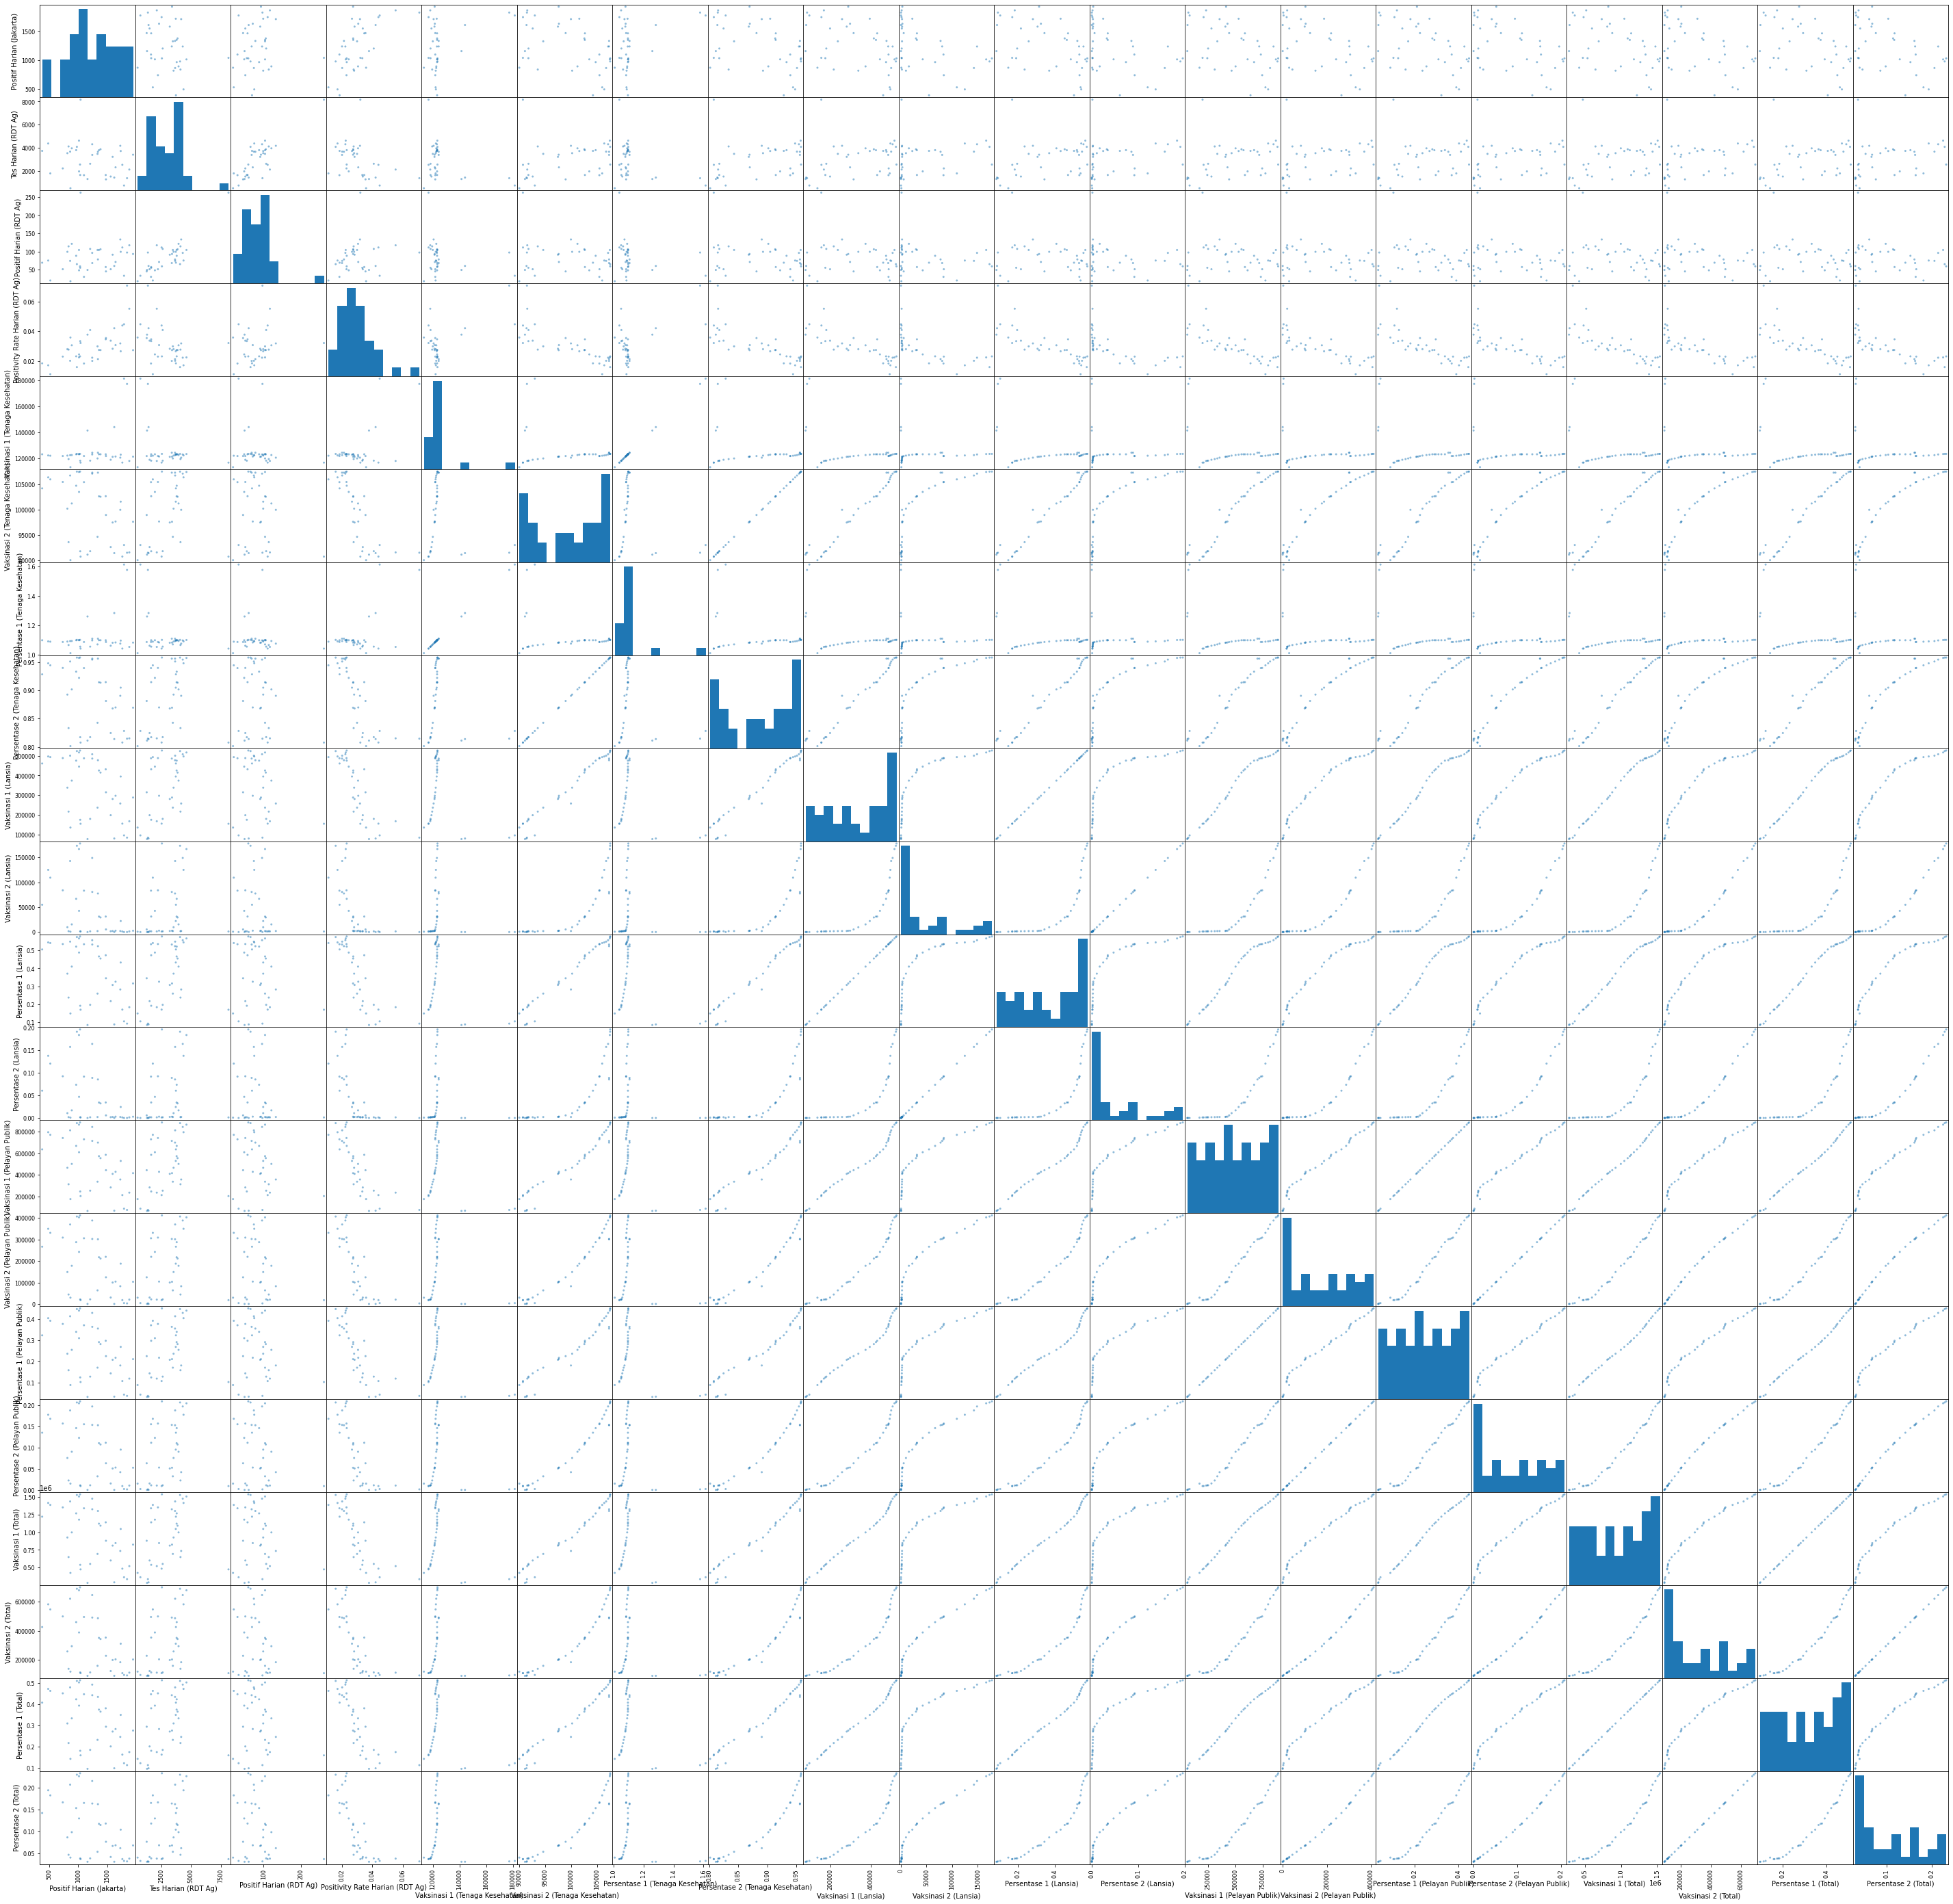

In [28]:
pd.plotting.scatter_matrix(dataset, figsize=(50, 50))

**Membuat matriks korelasi**

In [29]:
corr_matrix = dataset.corr()

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          38 non-null     datetime64[ns]
 1   Positif Harian (Jakarta)         38 non-null     int64         
 2   Tes Harian (RDT Ag)              38 non-null     int64         
 3   Positif Harian (RDT Ag)          38 non-null     int64         
 4   Positivity Rate Harian (RDT Ag)  38 non-null     float64       
 5   Vaksinasi 1 (Tenaga Kesehatan)   38 non-null     int64         
 6   Vaksinasi 2 (Tenaga Kesehatan)   38 non-null     int64         
 7   Persentase 1 (Tenaga Kesehatan)  38 non-null     float64       
 8   Persentase 2 (Tenaga Kesehatan)  38 non-null     float64       
 9   Vaksinasi 1 (Lansia)             38 non-null     int64         
 10  Vaksinasi 2 (Lansia)             38 non-null     int64         


**Variabel untuk menampung indeks fitur yang akan digunakan sebagai input**

In [31]:
chosen_feature = set()

**Meninjau nilai korelasi dan <em>scatter plot</em>**

Dalam proses peninjauan ini ada dua hal penting yang dilakukan. 
1. Menyiapkan fitur sebagai input dalam membuat model nantinya.
2. Menganalisis efisiensi vaksin.

Fitur yang tidak memenuhi kriteria sebagai data input akan diberi label "Low", sedangkan fitur yang memenuhi kriteria sebagai data input akan diberi label "High". Indeks dari fitur yang berlabel "High" langsung dimasukkan ke dalam variabel ```choosen_feature```.

Correlation: -0.236 (Low)


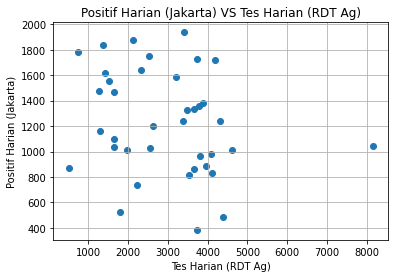

In [32]:
x = dataset['Tes Harian (RDT Ag)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Tes Harian (RDT Ag)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Tes Harian (RDT Ag)"))

Correlation: 0.145 (Low)


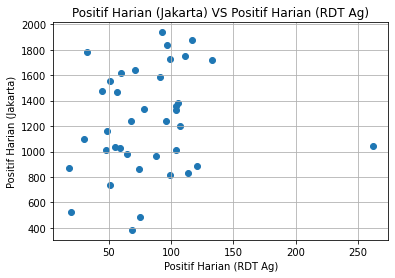

In [33]:
x = dataset['Positif Harian (RDT Ag)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Positif Harian (RDT Ag)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Positif Harian (RDT Ag)"))

Correlation: 0.633 (High)


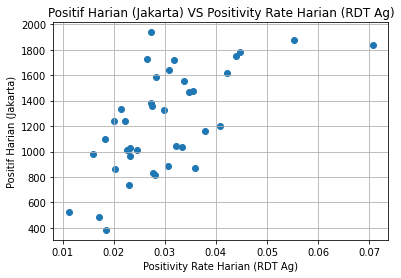

In [34]:
x = dataset['Positivity Rate Harian (RDT Ag)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Positivity Rate Harian (RDT Ag)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Positivity Rate Harian (RDT Ag)"))

Correlation: 0.329 (Low)


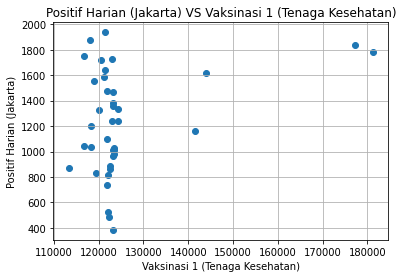

In [35]:
x = dataset['Vaksinasi 1 (Tenaga Kesehatan)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Vaksinasi 1 (Tenaga Kesehatan)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Vaksinasi 1 (Tenaga Kesehatan)"))

Correlation: -0.440 (Low)


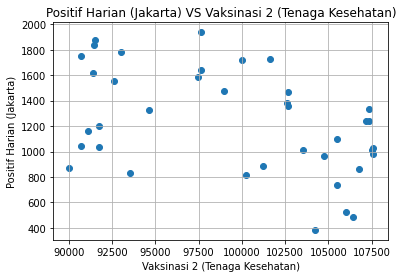

In [36]:
x = dataset['Vaksinasi 2 (Tenaga Kesehatan)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Vaksinasi 2 (Tenaga Kesehatan)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Vaksinasi 2 (Tenaga Kesehatan)"))

Correlation: 0.329 (Low)


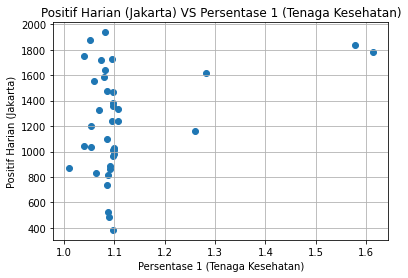

In [37]:
x = dataset['Persentase 1 (Tenaga Kesehatan)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Persentase 1 (Tenaga Kesehatan)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Persentase 1 (Tenaga Kesehatan)"))

Correlation: -0.440 (Low)


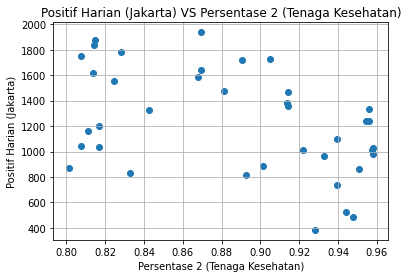

In [38]:
x = dataset['Persentase 2 (Tenaga Kesehatan)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Persentase 2 (Tenaga Kesehatan)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Persentase 2 (Tenaga Kesehatan)"))

Correlation: -0.494 (High)


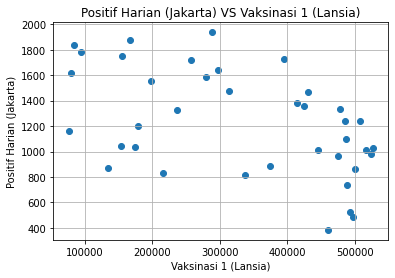

In [39]:
x = dataset['Vaksinasi 1 (Lansia)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Vaksinasi 1 (Lansia)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Vaksinasi 1 (Lansia)"))

Correlation: -0.495 (High)


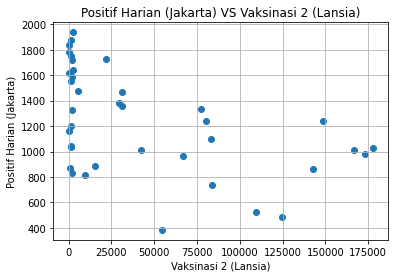

In [40]:
x = dataset['Vaksinasi 2 (Lansia)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Vaksinasi 2 (Lansia)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Vaksinasi 2 (Lansia)"))

Correlation: -0.494 (High)


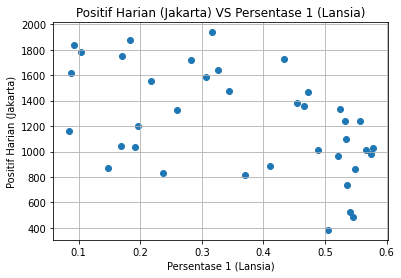

In [41]:
x = dataset['Persentase 1 (Lansia)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Persentase 1 (Lansia)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Persentase 1 (Lansia)"))

Correlation: -0.495 (High)


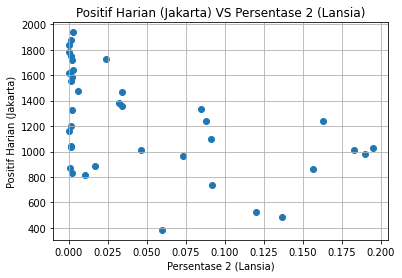

In [42]:
x = dataset['Persentase 2 (Lansia)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Persentase 2 (Lansia)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Persentase 2 (Lansia)"))

Correlation: -0.505 (High)


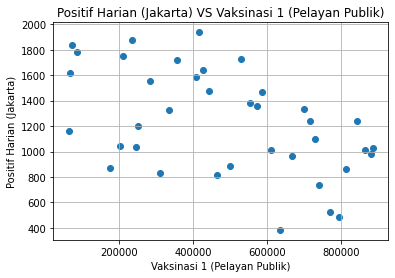

In [43]:
x = dataset['Vaksinasi 1 (Pelayan Publik)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Vaksinasi 1 (Pelayan Publik)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Vaksinasi 1 (Pelayan Publik)"))

Correlation: -0.519 (High)


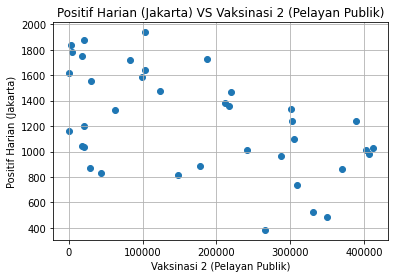

In [44]:
x = dataset['Vaksinasi 2 (Pelayan Publik)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Vaksinasi 2 (Pelayan Publik)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Vaksinasi 2 (Pelayan Publik)"))

Correlation: -0.505 (High)


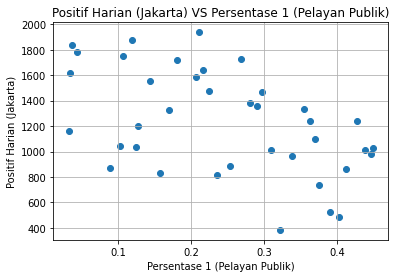

In [45]:
x = dataset['Persentase 1 (Pelayan Publik)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Persentase 1 (Pelayan Publik)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Persentase 1 (Pelayan Publik)"))

Correlation: -0.519 (High)


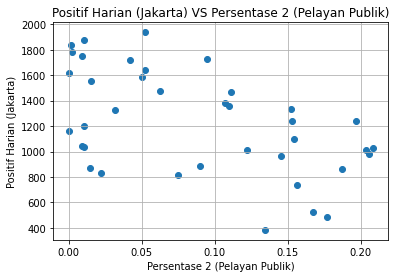

In [46]:
x = dataset['Persentase 2 (Pelayan Publik)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Persentase 2 (Pelayan Publik)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Persentase 2 (Pelayan Publik)"))

Correlation: -0.497 (High)


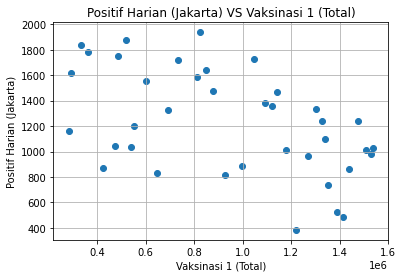

In [47]:
x = dataset['Vaksinasi 1 (Total)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Vaksinasi 1 (Total)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Vaksinasi 1 (Total)"))

Correlation: -0.519 (High)


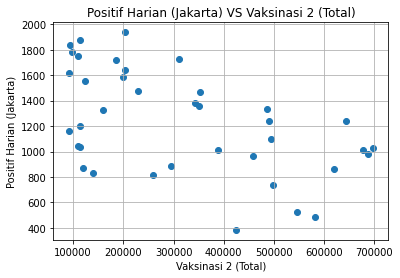

In [48]:
x = dataset['Vaksinasi 2 (Total)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Vaksinasi 2 (Total)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Vaksinasi 2 (Total)"))

Correlation: -0.497 (High)


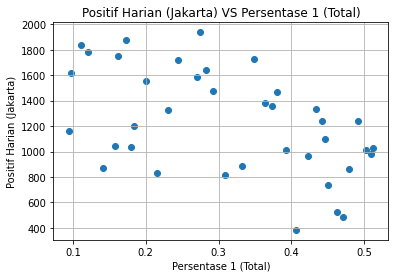

In [49]:
x = dataset['Persentase 1 (Total)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Persentase 1 (Total)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Persentase 1 (Total)"))

Correlation: -0.519 (High)


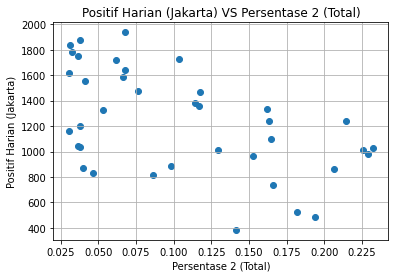

In [50]:
x = dataset['Persentase 2 (Total)']
y = dataset['Positif Harian (Jakarta)']
level = calculate_corr_and_plot_scatter(x,y,'Persentase 2 (Total)','Positif Harian (Jakarta)', corr_matrix)
if (level == "High"):
    chosen_feature.add(dataset.columns.get_loc("Persentase 2 (Total)"))

In [51]:
chosen_feature

{4, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}

# Analisis Nomor 2

In [52]:
corr_matrix["Positif Harian (Jakarta)"].sort_values(ascending=False)

Positif Harian (Jakarta)           1.000000
Positivity Rate Harian (RDT Ag)    0.632692
Persentase 1 (Tenaga Kesehatan)    0.328692
Vaksinasi 1 (Tenaga Kesehatan)     0.328692
Positif Harian (RDT Ag)            0.145230
Tes Harian (RDT Ag)               -0.236262
Persentase 2 (Tenaga Kesehatan)   -0.439848
Vaksinasi 2 (Tenaga Kesehatan)    -0.439848
Persentase 1 (Lansia)             -0.494320
Vaksinasi 1 (Lansia)              -0.494320
Vaksinasi 2 (Lansia)              -0.495212
Persentase 2 (Lansia)             -0.495212
Vaksinasi 1 (Total)               -0.497150
Persentase 1 (Total)              -0.497150
Persentase 1 (Pelayan Publik)     -0.504560
Vaksinasi 1 (Pelayan Publik)      -0.504560
Vaksinasi 2 (Total)               -0.518859
Persentase 2 (Total)              -0.518859
Vaksinasi 2 (Pelayan Publik)      -0.519226
Persentase 2 (Pelayan Publik)     -0.519226
Name: Positif Harian (Jakarta), dtype: float64

Dari korelasi tersebut kita memperoleh informasi bahwa vaksinasi tahap 2 merupakan faktor yang paling mempengaruhi penekanan laju pertambahan Positif Harian (Jakarta).

# Soal Nomor 3

**Membagi data menjadi data uji dan latih**

* Data latih berisi data yang ditinjau dari tanggal 5 Maret 2021 sampai tanggal 5 April 2021. 
* Data uji berisi data yang ditinjau dari tanggal 6 April 2021 sampai tanggal 12 April 2021

In [53]:
x_train = filter_data_by_date(dataset, "Tanggal", string_to_timestamp("5 Maret 2021"), string_to_timestamp("5 April 2021")).iloc[:,list(chosen_feature)].values
y_train = filter_data_by_date(dataset, "Tanggal", string_to_timestamp("5 Maret 2021"), string_to_timestamp("5 April 2021")).iloc[:,1:2].values

x_test = filter_data_by_date(dataset, "Tanggal", string_to_timestamp("6 April 2021")).iloc[:,list(chosen_feature)].values
y_test = filter_data_by_date(dataset, "Tanggal", string_to_timestamp("6 April 2021")).iloc[:,1:2].values

In [54]:
x_train.shape

(32, 13)

In [55]:
y_train.shape

(32, 1)

In [56]:
x_test.shape

(6, 13)

In [57]:
y_test.shape

(6, 1)

**Feature Scaling**

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## a. Decision Tree Regressor

**Membuat model**

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

max_depth_range = np.arange(1, 10, 1)
min_samples_leaf_range = np.arange(1, 10, 1)
param_grid = dict(max_depth=max_depth_range, min_samples_leaf=min_samples_leaf_range)

dtr = DecisionTreeRegressor()
dt_grid = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)

In [60]:
dt_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [61]:
print('The best parameteters are %s'
     % (dt_grid.best_params_))

The best parameteters are {'max_depth': 8, 'min_samples_leaf': 3}


**Memprediksi data uji**

In [62]:
dt_y_pred1 = dt_grid.predict(x_test)
dt_y_pred1

array([ 668.33333333, 1058.4       , 1058.4       , 1058.4       ,
        668.33333333, 1058.4       ])

**Memprediksi data latih**

In [63]:
dt_y_pred2 = dt_grid.predict(x_train)
dt_y_pred2

array([1196.25      , 1772.        , 1772.        , 1772.        ,
       1196.25      ,  969.66666667, 1772.        , 1772.        ,
        969.66666667, 1196.25      , 1196.25      ,  969.66666667,
       1545.66666667, 1545.66666667, 1545.66666667, 1683.        ,
       1683.        , 1683.        , 1058.33333333, 1058.33333333,
       1487.        , 1487.        , 1487.        , 1058.33333333,
       1058.4       ,  668.33333333, 1058.4       , 1058.4       ,
       1058.4       ,  668.33333333, 1058.4       ,  668.33333333])

## b. Gradient Boost

**Membuat model**

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(x_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrt.staged_predict(x_test)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(x_train, y_train)

c:\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(max_depth=2, n_estimators=16, random_state=42)

**Memprediksi data uji**

In [65]:
gbrt_y_pred1 = gbrt_best.predict(x_test)
gbrt_y_pred1

array([801.18992971, 988.16420005, 988.16420005, 988.16420005,
       801.18992971, 988.16420005])

**Memprediksi data latih**

In [66]:
gbrt_y_pred2 = gbrt_best.predict(x_train)
gbrt_y_pred2

array([1245.23674901, 1552.66632714, 1669.03456366, 1648.4604947 ,
       1245.23674901, 1245.23674901, 1636.565239  , 1669.03456366,
       1245.23674901, 1296.85926824, 1296.85926824, 1296.85926824,
       1296.85926824, 1333.92255557, 1333.92255557, 1470.01443999,
       1333.92255557, 1333.92255557, 1253.96673278, 1253.96673278,
       1429.24891927, 1293.15703484, 1293.15703484, 1293.15703484,
       1107.2142617 ,  875.77303528, 1136.2449775 , 1159.67307377,
       1159.67307377,  972.69880343,  994.02943608,  801.18992971])

## c. Random Forest Regression

**Membuat model**

In [67]:
from sklearn.ensemble import RandomForestRegressor

max_features_range = np.arange(1, 5, 1)
n_estimators_range = np.arange(10, 70, 10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rfr = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)

In [68]:
rf_grid.fit(x_train, y_train)

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': array([1, 2, 3, 4]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60])})

In [69]:
print('The best parameteters are %s'
     % (rf_grid.best_params_))

The best parameteters are {'max_features': 1, 'n_estimators': 20}


**Memprediksi data uji**

In [70]:
rf_y_pred1 = rf_grid.predict(x_test)
rf_y_pred1

array([674.55, 757.55, 786.6 , 786.6 , 674.55, 786.6 ])

**Memprediksi data latih**

In [71]:
rf_y_pred2 = rf_grid.predict(x_train)
rf_y_pred2

array([1280.15, 1511.3 , 1726.15, 1752.2 , 1056.65, 1146.65, 1655.1 ,
       1622.2 , 1188.4 , 1326.45, 1467.8 , 1107.  , 1414.65, 1653.9 ,
       1610.75, 1798.65, 1631.8 , 1512.85,  932.6 ,  948.85, 1486.05,
       1394.2 , 1379.9 , 1401.95, 1139.2 ,  658.5 ,  946.55, 1181.8 ,
       1143.6 ,  901.35,  894.15,  674.55])

# Analisis Nomor 3

In [72]:
rmse_train_dt = np.sqrt(mean_squared_error(y_train, dt_y_pred2))
rmse_train_gbrt = np.sqrt(mean_squared_error(y_train, gbrt_y_pred2))
rmse_train_rf = np.sqrt(mean_squared_error(y_train, rf_y_pred2))

rmse_test_dt = np.sqrt(mean_squared_error(y_test, dt_y_pred1))
rmse_test_gbrt = np.sqrt(mean_squared_error(y_test, gbrt_y_pred1))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, rf_y_pred1))


print("RMSE Random Forest Regression terhadap data latih         : %.3f" %(rmse_train_rf))
print("RMSE Gradient Boost terhadap data latih                   : %.3f" %(rmse_train_gbrt))
print("RMSE Decision Tree Regression terhadap data latih         : %.3f" %(rmse_train_dt))
print()
print("RMSE Random Forest Regression terhadap data uji           : %.3f" %(rmse_test_rf))
print("RMSE Gradient Boost terhadap data uji                     : %.3f" %(rmse_test_gbrt))
print("RMSE Decision Tree Regression terhadap data uji           : %.3f" %(rmse_test_dt))
print()
print("Selisih RMSE Random Forest Regression data latih dan uji : %.3f" %(abs(rmse_train_rf-rmse_test_rf)))
print("Selisih RMSE Gradient Boost data latih dan uji           : %.3f" %(abs(rmse_train_gbrt-rmse_test_gbrt)))
print("Selisih RMSE Decision Tree Regression data latih dan uji : %.3f" %(abs(rmse_train_dt-rmse_test_dt)))

RMSE Random Forest Regression terhadap data latih         : 137.274
RMSE Gradient Boost terhadap data latih                   : 256.659
RMSE Decision Tree Regression terhadap data latih         : 205.247

RMSE Random Forest Regression terhadap data uji           : 274.838
RMSE Gradient Boost terhadap data uji                     : 187.489
RMSE Decision Tree Regression terhadap data uji           : 183.557

Selisih RMSE Random Forest Regression data latih dan uji : 137.564
Selisih RMSE Gradient Boost data latih dan uji           : 69.171
Selisih RMSE Decision Tree Regression data latih dan uji : 21.691


Berdasarkan analisa di atas, diperoleh bahwa <em>Decision Tree Regression</em> merupakan model yang paling baik karena di antara nilai selisih RMSE prediksi data latih dengan RMSE prediksi data uji yang paling kecil dimiliki oleh model <em>Decision Tree Regression</em>. Artinya, model <em>Decision Tree Regression</em> adalah yang paling meyakinkan untuk dikatakan tidak mengalami <em>overfitting</em> ataupun <em>underfitting</em>.

# Soal Nomor 4

**Menerapkan PCA**

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca.shape

(32, 1)

## a. Decision Tree Regressor

**Membuat model**

In [74]:
# max_depth_range = np.arange(1, 10, 1)
min_samples_leaf_range = np.arange(1, 10, 1)
param_grid = dict(min_samples_leaf=min_samples_leaf_range)

dtr1 = DecisionTreeRegressor()
dt_grid1 = GridSearchCV(estimator=dtr1, param_grid=param_grid, cv=5)

In [75]:
dt_grid1.fit(x_train_pca, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [76]:
print('The best parameteters are %s'
     % (dt_grid1.best_params_))

The best parameteters are {'min_samples_leaf': 3}


**Memprediksi data uji**

In [77]:
dt_y_pred1 = dt_grid1.predict(x_test_pca)
dt_y_pred1

array([785.66666667, 785.66666667, 785.66666667, 785.66666667,
       785.66666667, 785.66666667])

**Memprediksi data latih**

In [78]:
dt_y_pred2 = dt_grid1.predict(x_train_pca)
dt_y_pred2

array([1653.        , 1653.        , 1653.        , 1653.        ,
       1216.25      , 1216.25      , 1216.25      , 1653.        ,
       1141.33333333, 1216.25      , 1141.33333333, 1141.33333333,
       1545.66666667, 1545.66666667, 1545.66666667, 1683.        ,
       1683.        , 1683.        , 1143.66666667, 1143.66666667,
       1143.66666667, 1401.66666667, 1401.66666667, 1401.66666667,
        988.        ,  988.        ,  988.        ,  988.        ,
        988.        ,  785.66666667,  785.66666667,  785.66666667])

## b. Gradient Boost

**Membuat model**

In [79]:
gbrt1 = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt1.fit(x_train_pca, y_train)

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrt1.staged_predict(x_test_pca)]
bst_n_estimators = np.argmin(errors) + 1

gbrt1_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt1_best.fit(x_train_pca, y_train)

c:\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(max_depth=2, n_estimators=10, random_state=42)

**Memprediksi data uji**

In [80]:
gbrt_y_pred1 = gbrt1_best.predict(x_test_pca)
gbrt_y_pred1

array([948.16222604, 948.16222604, 948.16222604, 948.16222604,
       948.16222604, 948.16222604])

**Memprediksi data latih**

In [81]:
gbrt_y_pred2 = gbrt1_best.predict(x_train_pca)
gbrt_y_pred2

array([1490.26317088, 1490.26317088, 1521.73986072, 1490.26317088,
       1330.85995174, 1330.85995174, 1330.85995174, 1490.26317088,
       1330.85995174, 1330.85995174, 1330.85995174, 1330.85995174,
       1330.85995174, 1365.90822698, 1365.90822698, 1365.90822698,
       1365.90822698, 1365.90822698, 1270.37137457, 1270.37137457,
       1308.96860745, 1308.96860745, 1308.96860745, 1308.96860745,
       1050.96308425,  980.00309751, 1122.14472354, 1122.14472354,
       1122.14472354, 1122.14472354,  969.46222604,  948.16222604])

## c. Random Forest Regression

**Membuat Model**

In [82]:
n_estimators_range = np.arange(1, 50, 10)
max_features_range = np.arange(1, 5, 1)
min_samples_leaf_range = np.arange(1,5,1)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range, min_samples_leaf=min_samples_leaf_range)

rfr1 = RandomForestRegressor()
rf_grid1 = GridSearchCV(estimator=rfr1, param_grid=param_grid, cv=5)

In [83]:
rf_grid1.fit(x_train_pca, y_train)

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "c:\python39\lib\site-packages\joblib\_parallel_backends.py", line 208

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'n_estimators': array([ 1, 11, 21, 31, 41])})

In [84]:
print('The best parameteters are %s'
     % (rf_grid1.best_params_))

The best parameteters are {'max_features': 1, 'min_samples_leaf': 4, 'n_estimators': 11}


**Memprediksi data uji**

In [85]:
rf_y_pred1 = rf_grid1.predict(x_test_pca)
rf_y_pred1

array([974.65000656, 974.65000656, 974.65000656, 974.65000656,
       974.65000656, 974.65000656])

**Memprediksi data latih**

In [86]:
rf_y_pred2 = rf_grid1.predict(x_train_pca)
rf_y_pred2

array([1476.48679982, 1476.48679982, 1476.48679982, 1476.48679982,
       1412.45573921, 1303.72608553, 1412.45573921, 1464.53907254,
       1189.55083301, 1189.55083301, 1215.82810573, 1215.82810573,
       1289.59256854, 1521.91983471, 1541.47412764, 1541.47412764,
       1541.47412764, 1549.35594582, 1318.61373803, 1318.61373803,
       1318.61373803, 1271.82207136, 1271.82207136, 1271.82207136,
       1013.65121999,  982.23333989,  982.23333989,  982.23333989,
        974.65000656,  974.65000656,  974.65000656,  974.65000656])

# Analisis Nomor 4

**Membuat visualisasi data**

Text(0.5, 0, 'PCA')

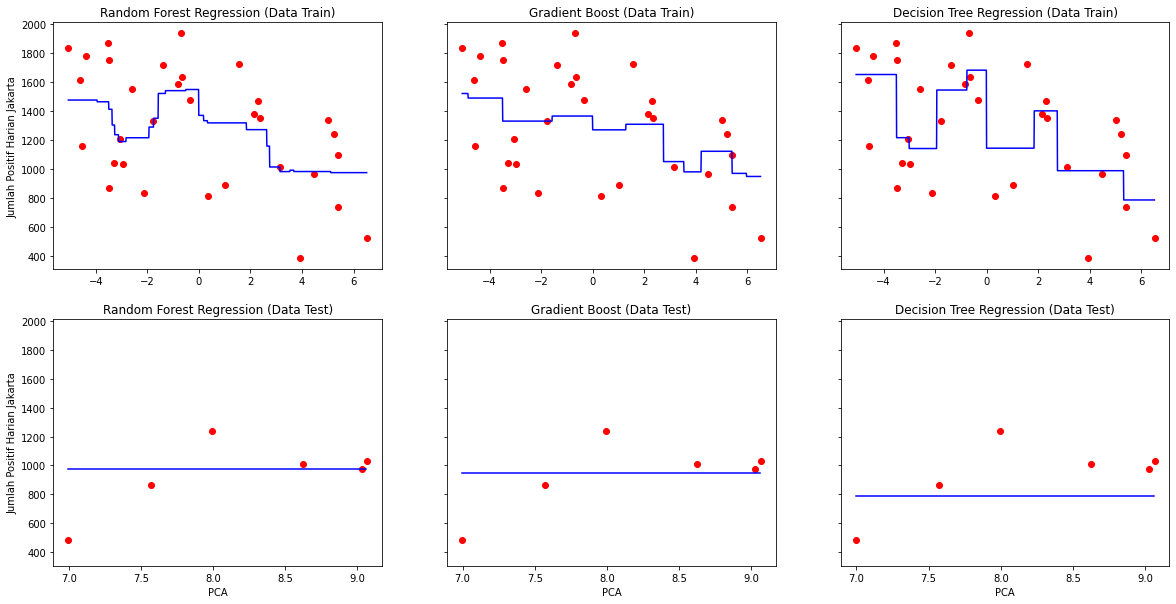

In [87]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,10), sharey=True)

plt.sca(axes[0][0])
X_grid = np.arange(min(x_train_pca), max(x_train_pca), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_train_pca, y_train, color = 'red')
plt.plot(X_grid, rf_grid1.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression (Data Train)')
plt.ylabel('Jumlah Positif Harian Jakarta')

plt.sca(axes[0][1])
X_grid = np.arange(min(x_train_pca), max(x_train_pca), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_train_pca, y_train, color = 'red')
plt.plot(X_grid, gbrt1_best.predict(X_grid), color = 'blue')
plt.title('Gradient Boost (Data Train)')


plt.sca(axes[0][2])
X_grid = np.arange(min(x_train_pca), max(x_train_pca), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_train_pca, y_train, color = 'red')
plt.plot(X_grid, dt_grid1.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression (Data Train)')


plt.sca(axes[1][0])
X_grid = np.arange(min(x_test_pca), max(x_test_pca), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_test_pca, y_test, color = 'red')
plt.plot(X_grid, rf_grid1.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression (Data Test)')
plt.ylabel('Jumlah Positif Harian Jakarta')
plt.xlabel('PCA')

plt.sca(axes[1][1])
X_grid = np.arange(min(x_test_pca), max(x_test_pca), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_test_pca, y_test, color = 'red')
plt.plot(X_grid, gbrt1_best.predict(X_grid), color = 'blue')
plt.title('Gradient Boost (Data Test)')
plt.xlabel('PCA')

plt.sca(axes[1][2])
X_grid = np.arange(min(x_test_pca), max(x_test_pca), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_test_pca, y_test, color = 'red')
plt.plot(X_grid, dt_grid1.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression (Data Test)')
plt.xlabel('PCA')


In [88]:
rmse_train_dt = np.sqrt(mean_squared_error(y_train, dt_y_pred2))
rmse_train_gbrt = np.sqrt(mean_squared_error(y_train, gbrt_y_pred2))
rmse_train_rf = np.sqrt(mean_squared_error(y_train, rf_y_pred2))

rmse_test_dt = np.sqrt(mean_squared_error(y_test, dt_y_pred1))
rmse_test_gbrt = np.sqrt(mean_squared_error(y_test, gbrt_y_pred1))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, rf_y_pred1))


print("RMSE Random Forest Regression terhadap data latih         : %.3f" %(rmse_train_rf))
print("RMSE Gradient Boost terhadap data latih                   : %.3f" %(rmse_train_gbrt))
print("RMSE Decision Tree Regression terhadap data latih         : %.3f" %(rmse_train_dt))
print()
print("RMSE Random Forest Regression terhadap data uji           : %.3f" %(rmse_test_rf))
print("RMSE Gradient Boost terhadap data uji                     : %.3f" %(rmse_test_gbrt))
print("RMSE Decision Tree Regression terhadap data uji           : %.3f" %(rmse_test_dt))
print()
print("Selisih RMSE Random Forest Regression data latih dan uji : %.3f" %(abs(rmse_train_rf-rmse_test_rf)))
print("Selisih RMSE Gradient Boost data latih dan uji           : %.3f" %(abs(rmse_train_gbrt-rmse_test_gbrt)))
print("Selisih RMSE Decision Tree Regression data latih dan uji : %.3f" %(abs(rmse_train_dt-rmse_test_dt)))

RMSE Random Forest Regression terhadap data latih         : 305.317
RMSE Gradient Boost terhadap data latih                   : 314.073
RMSE Decision Tree Regression terhadap data latih         : 278.953

RMSE Random Forest Regression terhadap data uji           : 232.746
RMSE Gradient Boost terhadap data uji                     : 229.702
RMSE Decision Tree Regression terhadap data uji           : 273.562

Selisih RMSE Random Forest Regression data latih dan uji : 72.571
Selisih RMSE Gradient Boost data latih dan uji           : 84.371
Selisih RMSE Decision Tree Regression data latih dan uji : 5.391


Berdasarkan analisa di atas, diperoleh bahwa <em>Decision Tree Regression</em> merupakan model yang paling baik karena di antara nilai selisih RMSE prediksi data latih dengan RMSE prediksi data uji yang paling kecil dimiliki oleh model <em>Decision Tree Regression</em>. Artinya, model <em>Decision Tree Regression</em> adalah yang paling meyakinkan untuk dikatakan tidak mengalami <em>overfitting</em> ataupun <em>underfitting</em>.

# Soal Nomor 5

In [89]:
dataset.head()

,Tanggal,Positif Harian (Jakarta),Tes Harian (RDT Ag),Positif Harian (RDT Ag),Positivity Rate Harian (RDT Ag),Vaksinasi 1 (Tenaga Kesehatan),Vaksinasi 2 (Tenaga Kesehatan),Persentase 1 (Tenaga Kesehatan),Persentase 2 (Tenaga Kesehatan),Vaksinasi 1 (Lansia),...,Persentase 1 (Lansia),Persentase 2 (Lansia),Vaksinasi 1 (Pelayan Publik),Vaksinasi 2 (Pelayan Publik),Persentase 1 (Pelayan Publik),Persentase 2 (Pelayan Publik),Vaksinasi 1 (Total),Vaksinasi 2 (Total),Persentase 1 (Total),Persentase 2 (Total)
0,2021-03-05,1159,1297,49,0.037779,141425,91078,1.259339,0.811017,76451,...,0.083862,0.000000,64121,0,0.032437,0.000000,281997,91078,0.093977,0.030352
1,2021-03-06,1616,1425,60,0.042105,144046,91379,1.282678,0.813697,79421,...,0.087120,0.000000,66484,0,0.033633,0.000000,289951,91379,0.096628,0.030453
2,2021-03-07,1834,1371,97,0.070751,177126,91460,1.577243,0.814418,83628,...,0.091734,0.000000,73752,2514,0.037310,0.001272,334506,93974,0.111476,0.031317
3,2021-03-08,1783,737,33,0.044776,181237,92988,1.613850,0.828025,95140,...,0.104362,0.000001,85333,3989,0.043168,0.002018,361710,96978,0.120542,0.032319
4,2021-03-09,867,502,18,0.035857,113326,89984,1.009127,0.801275,135128,...,0.148227,0.000740,174685,29195,0.088369,0.014769,423139,119854,0.141014,0.039942


In [90]:
dataset['Kelas'] = 0

for i in range(0,len(dataset)):
    if dataset['Positivity Rate Harian (RDT Ag)'][i] < 0.033:
        dataset['Kelas'][i] = 0
    elif dataset['Positivity Rate Harian (RDT Ag)'][i] > 0.05:
        dataset['Kelas'][i] = 2
    else:  
        dataset['Kelas'][i] = 1
        
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          38 non-null     datetime64[ns]
 1   Positif Harian (Jakarta)         38 non-null     int64         
 2   Tes Harian (RDT Ag)              38 non-null     int64         
 3   Positif Harian (RDT Ag)          38 non-null     int64         
 4   Positivity Rate Harian (RDT Ag)  38 non-null     float64       
 5   Vaksinasi 1 (Tenaga Kesehatan)   38 non-null     int64         
 6   Vaksinasi 2 (Tenaga Kesehatan)   38 non-null     int64         
 7   Persentase 1 (Tenaga Kesehatan)  38 non-null     float64       
 8   Persentase 2 (Tenaga Kesehatan)  38 non-null     float64       
 9   Vaksinasi 1 (Lansia)             38 non-null     int64         
 10  Vaksinasi 2 (Lansia)             38 non-null     int64         


<ipython-input-90-fa2faa78763e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Kelas'][i] = 1
<ipython-input-90-fa2faa78763e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Kelas'][i] = 2
<ipython-input-90-fa2faa78763e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Kelas'][i] = 0


# Soal Nomor 6

**Menentukan fitur input**

In [91]:
def choose_good_feature(dataset, prime_key):
    chosen_feature = set()
    corr_matrix = dataset.corr()
    neg_corr, pos_corr = correlation_mean(corr_matrix, prime_key)
    for key, val in corr_matrix[prime_key].items():
        if(val > 0 and val > pos_corr and val != 1):
            chosen_feature.add(dataset.columns.get_loc(key))
            print(key, val)
        elif(val < 0 and val < neg_corr ):
            chosen_feature.add(dataset.columns.get_loc(key))
            print(key, val)
            
    return chosen_feature

**Fitur yang digunakan sebagai input beserta nilai korelasinya terhadap fiture "Kelas"**

In [92]:
chosen_feature = choose_good_feature(dataset, 'Kelas')

Tes Harian (RDT Ag) -0.6076229930598067
Positivity Rate Harian (RDT Ag) 0.8723846680019262
Vaksinasi 2 (Tenaga Kesehatan) -0.6820477130576165
Persentase 2 (Tenaga Kesehatan) -0.682047713065031
Vaksinasi 1 (Lansia) -0.6934576614532307
Persentase 1 (Lansia) -0.6934576614875162
Vaksinasi 1 (Pelayan Publik) -0.6752231052781023
Vaksinasi 2 (Pelayan Publik) -0.6255523949264816
Persentase 1 (Pelayan Publik) -0.6752231052564162
Persentase 2 (Pelayan Publik) -0.6255523949357454
Vaksinasi 1 (Total) -0.6777857567113774
Persentase 1 (Total) -0.6777857567542184


**Di bawah ini adalah index dari fitur yang akan digunakan sebagai input**

In [93]:
chosen_feature

{2, 4, 6, 8, 9, 11, 13, 14, 15, 16, 17, 19}

**Membagi data menjadi data uji dan data latih**

In [94]:
x_train = filter_data_by_date(dataset, "Tanggal", string_to_timestamp("5 Maret 2021"), string_to_timestamp("5 April 2021")).iloc[:,list(chosen_feature)].values
y_train = filter_data_by_date(dataset, "Tanggal", string_to_timestamp("5 Maret 2021"), string_to_timestamp("5 April 2021")).iloc[:,21:22].values

x_test = filter_data_by_date(dataset, "Tanggal", string_to_timestamp("6 April 2021")).iloc[:,list(chosen_feature)].values
y_test = filter_data_by_date(dataset, "Tanggal", string_to_timestamp("6 April 2021")).iloc[:,21:22].values

In [95]:
x_train.shape

(32, 12)

In [96]:
x_train.shape

(32, 12)

In [97]:
x_test.shape

(6, 12)

**Feature Scaling**

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[-1.01043015,  0.53578432, -1.22025641, -1.22025641, -1.57249401,
        -1.57249401, -1.63856023, -1.18583623, -1.63856023, -1.18583623,
        -1.59750701, -1.59750701],
       [-0.92243963,  0.92186241, -1.16838148, -1.16838148, -1.55152763,
        -1.55152763, -1.62762394, -1.18583623, -1.62762394, -1.18583623,
        -1.57487213, -1.57487213],
       [-0.95956063,  3.47853857, -1.15442178, -1.15442178, -1.5218288 ,
        -1.5218288 , -1.59398664, -1.16359844, -1.59398664, -1.16359844,
        -1.44808092, -1.44808092],
       [-1.39538865,  1.16023815, -0.89108328, -0.89108328, -1.44056115,
        -1.44056115, -1.54038819, -1.15055121, -1.54038819, -1.15055121,
        -1.37066587, -1.37066587],
       [-1.55693374,  0.36416263, -1.4087985 , -1.4087985 , -1.15827044,
        -1.15827045, -1.12685493, -0.92758952, -1.12685493, -0.92758952,
        -1.19585593, -1.19585593],
       [ 3.70737382,  0.02958588, -1.28867616, -1.28867616, -1.02327382,
        -1.02327382, -

## a. Voting Classifier

**Membuat Model**

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [100]:
voting_clf.fit(x_train, y_train)

c:\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

**Memprediksi data uji**

In [101]:
voting_y_pred1 = voting_clf.predict(x_test)
voting_y_pred1

array([0, 0, 0, 0, 0, 0], dtype=int64)

**Memprediksi data uji**

In [102]:
voting_y_pred2= voting_clf.predict(x_train)
voting_y_pred2

array([1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## b. AdaBoost

**Membuat Model**

In [103]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(x_train, y_train)

c:\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

**Memprediksi data uji**

In [104]:
ada_y_pred1 = ada_clf.predict(x_test)
ada_y_pred1

array([0, 0, 0, 0, 0, 0], dtype=int64)

**Memprediksi data uji**

In [105]:
ada_y_pred2= ada_clf.predict(x_train)
ada_y_pred2

array([1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Analisa Nomor 6

In [106]:
from sklearn.metrics import accuracy_score

voting_test_score = accuracy_score(y_test, voting_y_pred1)
voting_train_score = accuracy_score(y_train, voting_y_pred2)

ada_test_score = accuracy_score(y_test, ada_y_pred1)
ada_train_score = accuracy_score(y_train, ada_y_pred2)


print("VotingClassifier accuracy score (test): %.3f" %(voting_test_score))
print("VotingClassifier accuracy score (train): %.3f" %(voting_train_score))
print("AdaBoost accuracy score (test): %.3f" %(ada_test_score))
print("AdaBoost accuracy score (train): %.3f" %(ada_train_score))

VotingClassifier accuracy score (test): 1.000
VotingClassifier accuracy score (train): 0.938
AdaBoost accuracy score (test): 1.000
AdaBoost accuracy score (train): 1.000


Dari analisa di atas, dapat disimpulkan bahwa model <em>AdaBoost</em> memiliki skor akurasi yang sempurna untuk hasil prediksi data latih dan data uji. Artinya, model <em>AdaBoost</em> merupakan model yang paling baik dalam kasus ini.

#### “Di hadapan TUHAN yang hidup, saya menegaskan bahwa saya tidak memberikan maupun menerima bantuan apa pun—baik lisan, tulisan, maupun elektronik—di dalam ujian ini selain daripada apa yang telah diizinkan oleh pengajar, dan tidak akan menyebarkan baik soal maupun jawaban ujian kepada pihak lain.”